#NER(Named Entity Recognition)

In [ ]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==1.15


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 503 kB 51.5 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 3.8 MB 49.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=42e100a66b8b938085e21ae04df35cd4d5864852d7554e69e6f7d75684f0c9ea
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [ ]:
pip install numpy==1.18.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.1 MB 4.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
jaxlib 0.3.7+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.8 requires numpy>=1.19, but you have 

In [ ]:
!pip uninstall h5py
!pip install h5py==2.10.0

Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.4 MB/s 


In [1]:
#Import the necessary libraries

import requests
import re
import os
import zipfile
import collections
import numpy as np
import pandas as pd
import urllib.request
import operator
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
from IPython.core.display import HTML

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import Model
from collections import defaultdict
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Bidirectional,add
import tensorflow.keras.backend as K
from sklearn.metrics import classification_report, f1_score, accuracy_score
from tensorflow.keras import layers

In [2]:
#Read the dataset as pandas dataframe
df=pd.read_json("/content/drive/MyDrive/WIESP2022-NER-TRAINING.jsonl",lines=True)

In [3]:
#quick look of the dataset
df.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...",fulltext,"[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,2018MNRAS.478.5533F,1129,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[comparison, once, the, angular, positions, of...",fulltext_1129_2018MNRAS.478.5533F
2,2018MNRAS.480.3062L,1086,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",acknowledgments,"[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
3,2016MNRAS.457.1786M,1135,"[22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...","[B-Person, O, O, O, O, B-Organization, B-Grant...",acknowledgments,"[BDM, gratefully, acknowledges, support, from,...",acknowledgments_1135_2016MNRAS.457.1786M
4,2019MNRAS.482L...9B,559,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...",acknowledgments,"[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B


In [4]:
shape=df.shape
print(f"The shape of the dataset is {shape}")

The shape of the dataset is (1753, 7)


In [5]:
# unique NER tags in the dataset 
unique_tags=[]
for i in df.ner_tags:
  for j in i:
    if j not in unique_tags:
      unique_tags.append(j)

num_tags=len(unique_tags)
print(f"There are {num_tags} unique NER tags in the dataset.\n")

for tag in unique_tags:
  print(tag)

There are 63 unique NER tags in the dataset.

O
B-Instrument
B-Mission
B-Citation
I-Citation
B-Telescope
B-Wavelength
I-Wavelength
B-Model
I-Model
B-Software
I-Software
B-Formula
I-Formula
B-Person
B-Organization
I-Organization
B-Fellowship
I-Fellowship
B-Grant
I-Grant
I-Person
B-Location
I-Location
B-Event
I-Event
B-URL
B-Collaboration
I-Collaboration
B-CelestialObject
I-CelestialObject
B-Dataset
I-Dataset
B-CelestialObjectRegion
I-CelestialObjectRegion
B-TextGarbage
I-TextGarbage
B-Survey
B-ObservationalTechniques
I-ObservationalTechniques
B-ComputingFacility
I-ComputingFacility
I-Survey
I-Telescope
B-Observatory
B-CelestialRegion
I-CelestialRegion
B-Archive
I-Archive
B-Proposal
I-Observatory
B-Database
I-Database
B-Tag
B-Identifier
I-Identifier
I-Mission
I-URL
I-Tag
I-Proposal
I-Instrument
B-EntityOfFutureInterest
I-EntityOfFutureInterest


In [6]:
# creating a dictionary to map tags to ids
tag_to_id={}

for i in range(len(df)):
  for idx,j in enumerate(df.ner_tags[i]):
    if j not in tag_to_id.keys():
      tag_to_id[j]=df.ner_ids[i][idx]

print(tag_to_id)

{'O': 62, 'B-Instrument': 15, 'B-Mission': 17, 'B-Citation': 4, 'I-Citation': 35, 'B-Telescope': 27, 'B-Wavelength': 30, 'I-Wavelength': 61, 'B-Model': 18, 'I-Model': 49, 'B-Software': 24, 'I-Software': 55, 'B-Formula': 12, 'I-Formula': 43, 'B-Person': 22, 'B-Organization': 21, 'I-Organization': 52, 'B-Fellowship': 11, 'I-Fellowship': 42, 'B-Grant': 13, 'I-Grant': 44, 'I-Person': 53, 'B-Location': 16, 'I-Location': 47, 'B-Event': 10, 'I-Event': 41, 'B-URL': 29, 'B-Collaboration': 5, 'I-Collaboration': 36, 'B-CelestialObject': 1, 'I-CelestialObject': 32, 'B-Dataset': 8, 'I-Dataset': 39, 'B-CelestialObjectRegion': 2, 'I-CelestialObjectRegion': 33, 'B-TextGarbage': 28, 'I-TextGarbage': 59, 'B-Survey': 25, 'B-ObservationalTechniques': 19, 'I-ObservationalTechniques': 50, 'B-ComputingFacility': 6, 'I-ComputingFacility': 37, 'I-Survey': 56, 'I-Telescope': 58, 'B-Observatory': 20, 'B-CelestialRegion': 3, 'I-CelestialRegion': 34, 'B-Archive': 0, 'I-Archive': 31, 'B-Proposal': 23, 'I-Observator

In [7]:
#creating a dictionary to map ids to tags

id_to_tag = {value : key for key, value in tag_to_id.items()}

print(id_to_tag)

{62: 'O', 15: 'B-Instrument', 17: 'B-Mission', 4: 'B-Citation', 35: 'I-Citation', 27: 'B-Telescope', 30: 'B-Wavelength', 61: 'I-Wavelength', 18: 'B-Model', 49: 'I-Model', 24: 'B-Software', 55: 'I-Software', 12: 'B-Formula', 43: 'I-Formula', 22: 'B-Person', 21: 'B-Organization', 52: 'I-Organization', 11: 'B-Fellowship', 42: 'I-Fellowship', 13: 'B-Grant', 44: 'I-Grant', 53: 'I-Person', 16: 'B-Location', 47: 'I-Location', 10: 'B-Event', 41: 'I-Event', 29: 'B-URL', 5: 'B-Collaboration', 36: 'I-Collaboration', 1: 'B-CelestialObject', 32: 'I-CelestialObject', 8: 'B-Dataset', 39: 'I-Dataset', 2: 'B-CelestialObjectRegion', 33: 'I-CelestialObjectRegion', 28: 'B-TextGarbage', 59: 'I-TextGarbage', 25: 'B-Survey', 19: 'B-ObservationalTechniques', 50: 'I-ObservationalTechniques', 6: 'B-ComputingFacility', 37: 'I-ComputingFacility', 56: 'I-Survey', 58: 'I-Telescope', 20: 'B-Observatory', 3: 'B-CelestialRegion', 34: 'I-CelestialRegion', 0: 'B-Archive', 31: 'I-Archive', 23: 'B-Proposal', 51: 'I-Observ

In [8]:
#creating a function to clean the dataset

def clean_data(data,tags):
  d = []
  t = []
  for i in range(len(data)):
    tok_list = ['<s>']
    tag_list = ["O"]
    for j in range(len(data[i])):
      x = re.sub(r'[^a-zA-Z0\s]', '', data[i][j])
      x = x.lower()
      if len(x)!=0:
        tok_list.append(x)
        tag_list.append(tags[i][j])
    tok_list.append("</s>")
    tag_list.append("O")
    d.append(tok_list)
    t.append(tag_list)
  
  return d , t


def clean_tokens(data, tokenizer):
  d=[]
  for i in range(len(data)):
    tok_list=[]
    for j in range(len(data[i])):
      x = re.sub(r'[^a-zA-Z0\s]', '', data[i][j])
      x = x.lower()
      if len(x)!=0:
        tok_list.append(x)
    d.append(tok_list)

  tokens = tokenizer.texts_to_sequences(d)
  return tokens

In [9]:
# cleaning the data
tokens,tags=clean_data(df.tokens.values,df.ner_tags.values)

In [10]:
#converting tags into numbers
def tag_to_num(tags):
  for i in range(len(tags)):
    for j in range(len(tags[i])):
      tags[i][j] = tag_to_id[tags[i][j]]

  return tags

In [11]:
labels = tag_to_num(tags)

In [ ]:
#word to number
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None,
                                                  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  lower=True,
                                                  oov_token = "UNK")

tokenizer.fit_on_texts(tokens)

data = tokenizer.texts_to_sequences(tokens)

In [ ]:
#split the data into train and validation sets

train_sentences, val_sentences, train_tags, val_tags = train_test_split(data, labels, train_size = 0.85, random_state = 34)

In [ ]:
#padding the sequences

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_sentences, padding="post")

train_label = tf.keras.preprocessing.sequence.pad_sequences(train_tags, padding="post")

val_data = tf.keras.preprocessing.sequence.pad_sequences(val_sentences, padding="post")

val_label = tf.keras.preprocessing.sequence.pad_sequences(val_tags, padding="post")

###RNN

In [ ]:
#defining the vocabulary size
vocab_size=len(tokenizer.word_counts)

In [ ]:
#RNN model architecture
input = tf.keras.Input(shape=[None])

emb = tf.keras.layers.Embedding(input_dim = vocab_size+1, output_dim = 300, mask_zero = True)(input)
l1= tf.keras.layers.SimpleRNN(128, return_sequences = True, name = "RNN_layer_1")(emb)
l2 = tf.keras.layers.SimpleRNN(128, return_sequences = True, name = "RNN_layer_2")(l1)
l3 = tf.keras.layers.Dense(512, activation = "relu", name = "Dense_layer_1")(l2)
l4 = tf.keras.layers.Dropout(0.2, name = "Dropout_layer")(l3)
l5 = tf.keras.layers.Dense(256, activation = "relu", name = "Dense_layer_2")(l4)
output = tf.keras.layers.Dense(num_tags, activation = 'softmax', name = "output_layer")(l5)

model_rnn = tf.keras.Model(input, output)

In [ ]:
#Look at the summary of the model
model_rnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 300)         7466700   
                                                                 
 RNN_layer_1 (SimpleRNN)     (None, None, 128)         54912     
                                                                 
 RNN_layer_2 (SimpleRNN)     (None, None, 128)         32896     
                                                                 
 Dense_layer_1 (Dense)       (None, None, 512)         66048     
                                                                 
 Dropout_layer (Dropout)     (None, None, 512)         0         
                                                                 
 Dense_layer_2 (Dense)       (None, None, 256)         1313

In [ ]:
#compile and fitting the model
model_rnn.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                  optimizer = 'adam',
                  metrics=["accuracy"])

history1 = model_rnn.fit(train_data, train_label, validation_data = (val_data, val_label), epochs = 20, batch_size = 32)

Epoch 1/20
47/47 [==============================] - 52s 1s/step - loss: 0.4812 - accuracy: 0.8181 - val_loss: 0.4394 - val_accuracy: 0.8291
Epoch 2/20
47/47 [==============================] - 49s 1s/step - loss: 0.2856 - accuracy: 0.8545 - val_loss: 0.2951 - val_accuracy: 0.8744
Epoch 3/20
47/47 [==============================] - 50s 1s/step - loss: 0.1988 - accuracy: 0.8872 - val_loss: 0.2337 - val_accuracy: 0.8901
Epoch 4/20
47/47 [==============================] - 51s 1s/step - loss: 0.1540 - accuracy: 0.9058 - val_loss: 0.1951 - val_accuracy: 0.9053
Epoch 5/20
47/47 [==============================] - 50s 1s/step - loss: 0.1237 - accuracy: 0.9265 - val_loss: 0.1727 - val_accuracy: 0.9150
Epoch 6/20
47/47 [==============================] - 49s 1s/step - loss: 0.1017 - accuracy: 0.9393 - val_loss: 0.1569 - val_accuracy: 0.9230
Epoch 7/20
47/47 [==============================] - 50s 1s/step - loss: 0.0843 - accuracy: 0.9483 - val_loss: 0.1460 - val_accuracy: 0.9273
Epoch 8/20
47/47 [==

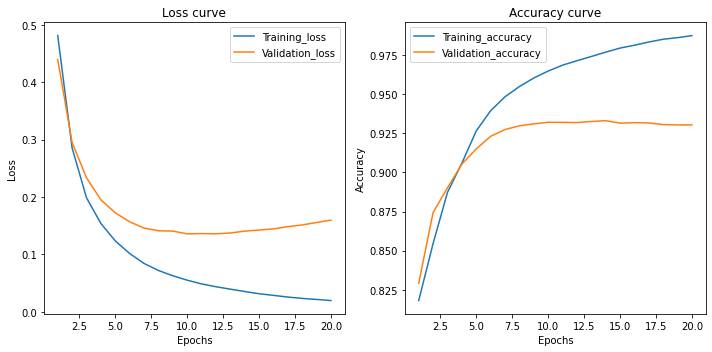

In [ ]:
#Plotting the accuracy and loss curve
fig , ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(range(1,21), history1.history["loss"], label="Training_loss")
ax[0].plot(range(1,21), history1.history["val_loss"], label="Validation_loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss curve")
ax[0].legend()


ax[1].plot(range(1,21), history1.history["accuracy"], label="Training_accuracy")
ax[1].plot(range(1,21), history1.history["val_accuracy"], label="Validation_accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy curve")
ax[1].legend()

fig.tight_layout()
plt.show()

Since most of the words in sentences are tagged as "O", the accuracy metric is very misleading for model evaluation. Therefore, our main metric to evaluate our models will be F1 score because we need a balance between precision and recall. 

In [ ]:
# Prediction on validation set
pred=[]
for sent in val_sentences:
  p = model_rnn.predict(np.array(sent).reshape(-1,1))
  pred.append(np.argmax(p,axis=2))

In [ ]:
#Flatten the array of true validation tags and pred validation tags to calculate the f1_score
val_pred = []
val_true = []
for i in range(len(pred)):
  for j, p in enumerate(pred[i]):
    val_pred.append(p)
    val_true.append(val_tags[i][j])

print(len(val_pred), len(val_true))

81829 81829


In [ ]:
#Calculate the f1_score on validation set
f1_score_rnn = f1_score(val_true, val_pred, average = "weighted")

#calculate the accuracy on validation set
accuracy_rnn = accuracy_score(val_true, val_pred)

In [ ]:
print(f"The f1_score of SimpleRNN model on validation set is {np.round(f1_score_rnn*100,2)}%")
print(f"The accuracy of SimpleRNN model on validation set is {np.round(accuracy_rnn*100,2)}%")


The f1_score of SimpleRNN model on validation set is 84.14%
The accuracy of SimpleRNN model on validation set is 82.09%


Since we are only predicting for the words which are in the validation sentence excluding padding words so, the accuracy score we are getting here will be different from the one which is showing in the training of the model.

###LSTM

In [ ]:
#LSTM model architecture
input = tf.keras.Input(shape=[None])

emb = tf.keras.layers.Embedding(input_dim = vocab_size+1, output_dim = 300, mask_zero = True)(input)
l1= tf.keras.layers.LSTM(128, return_sequences = True, name = "LSTM_layer_1")(emb)
l2 = tf.keras.layers.LSTM(128, return_sequences = True, name = "LSTM_layer_2")(l1)
l3 = tf.keras.layers.Dense(512, activation = "relu", name = "Dense_layer_1")(l2)
l4 = tf.keras.layers.Dropout(0.2, name = "Dropout_layer")(l3)
l5 = tf.keras.layers.Dense(256, activation = "relu", name = "Dense_layer_2")(l4)
output = tf.keras.layers.Dense(num_tags, activation = 'softmax', name = "output_layer")(l5)

model_lstm = tf.keras.Model(input, output)

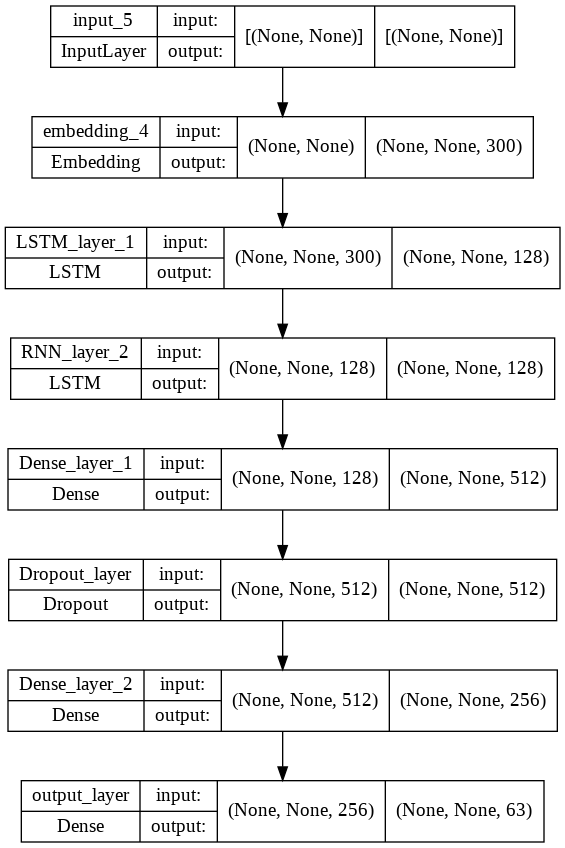

In [ ]:
#Plotting the model
tf.keras.utils.plot_model(model_lstm, show_shapes = True)

In [ ]:
#Compile and fiiting the model
model_lstm.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                   optimizer = "adam",
                   metrics = ["accuracy"])

history2 = model_lstm.fit(train_data, train_label, validation_data = (val_data, val_label), epochs = 20, batch_size = 32)

Epoch 1/20
47/47 [==============================] - 16s 127ms/step - loss: 0.5944 - accuracy: 0.8192 - val_loss: 0.4618 - val_accuracy: 0.8291
Epoch 2/20
47/47 [==============================] - 3s 73ms/step - loss: 0.3403 - accuracy: 0.8348 - val_loss: 0.3808 - val_accuracy: 0.8294
Epoch 3/20
47/47 [==============================] - 3s 72ms/step - loss: 0.2750 - accuracy: 0.8388 - val_loss: 0.3146 - val_accuracy: 0.8439
Epoch 4/20
47/47 [==============================] - 3s 73ms/step - loss: 0.2225 - accuracy: 0.8575 - val_loss: 0.2765 - val_accuracy: 0.8588
Epoch 5/20
47/47 [==============================] - 3s 72ms/step - loss: 0.1852 - accuracy: 0.8785 - val_loss: 0.2399 - val_accuracy: 0.8770
Epoch 6/20
47/47 [==============================] - 3s 73ms/step - loss: 0.1551 - accuracy: 0.8968 - val_loss: 0.2221 - val_accuracy: 0.8897
Epoch 7/20
47/47 [==============================] - 3s 73ms/step - loss: 0.1372 - accuracy: 0.9072 - val_loss: 0.2043 - val_accuracy: 0.8964
Epoch 8/20


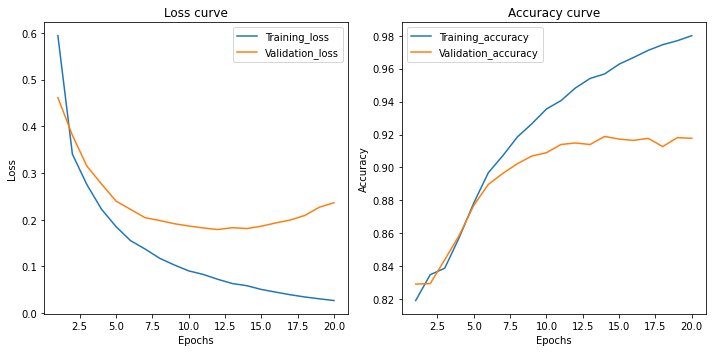

In [ ]:
#Plotting the accuracy and loss curve
fig , ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(range(1,21), history2.history["loss"], label="Training_loss")
ax[0].plot(range(1,21), history2.history["val_loss"], label="Validation_loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss curve")
ax[0].legend()


ax[1].plot(range(1,21), history2.history["accuracy"], label="Training_accuracy")
ax[1].plot(range(1,21), history2.history["val_accuracy"], label="Validation_accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy curve")
ax[1].legend()

fig.tight_layout()
plt.show()

In [ ]:
# Prediction on validation set
pred=[]
for sent in val_sentences:
  p = model_lstm.predict(np.array(sent).reshape(-1,1))
  pred.append(np.argmax(p,axis=2))

In [ ]:
#Flatten the array of true validation tags and pred validation tags to calculate the f1_score
val_pred = []
val_true = []
for i in range(len(pred)):
  for j, p in enumerate(pred[i]):
    val_pred.append(p)
    val_true.append(val_tags[i][j])

print(len(val_pred), len(val_true))

81829 81829


In [ ]:
#Calculate the f1_score on validation set
f1_score_lstm = f1_score(val_true, val_pred, average = "weighted")

#calculate the accuracy on validation set
accuracy_lstm = accuracy_score(val_true, val_pred)

In [ ]:
print(f"The f1_score of LSTM model on validation set is {np.round(f1_score_lstm*100,2)}%")
print(f"The accuracy of LSTM model on validation set is {np.round(accuracy_lstm*100,2)}%")

The f1_score of LSTM model on validation set is 82.74%
The accuracy of LSTM model on validation set is 86.4%


###GRU

In [ ]:
#GRU model architecture
input = tf.keras.Input(shape=[None])

emb = tf.keras.layers.Embedding(input_dim = vocab_size+1, output_dim = 300, mask_zero = True)(input)
l1= tf.keras.layers.GRU(128, return_sequences = True, name = "GRU_layer_1")(emb)
l2= tf.keras.layers.GRU(128, return_sequences = True, name = "GRU_layer_2")(l1)
l3 = tf.keras.layers.Dense(512, activation = "relu", name = "Dense_layer_1")(l2)
l4 = tf.keras.layers.Dropout(0.2, name = "Dropout_layer")(l3)
l5 = tf.keras.layers.Dense(256, activation = "relu", name = "Dense_layer_2")(l4)
output = tf.keras.layers.Dense(num_tags, activation = 'softmax', name = "output_layer")(l5)

model_gru = tf.keras.Model(input, output)

In [ ]:
#Look at the summary of the model
model_gru.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 300)         7466700   
                                                                 
 GRU_layer_1 (GRU)           (None, None, 128)         165120    
                                                                 
 GRU_layer_2 (GRU)           (None, None, 128)         99072     
                                                                 
 Dense_layer_1 (Dense)       (None, None, 512)         66048     
                                                                 
 Dropout_layer (Dropout)     (None, None, 512)         0         
                                                                 
 Dense_layer_2 (Dense)       (None, None, 256)         1313

In [ ]:
#Compile and fiiting the model
model_gru.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                   optimizer = "adam",
                   metrics = ["accuracy"])

history3 = model_gru.fit(train_data, train_label, validation_data = (val_data, val_label), epochs = 20, batch_size = 32)

Epoch 1/20
47/47 [==============================] - 13s 127ms/step - loss: 0.5774 - accuracy: 0.8152 - val_loss: 0.3908 - val_accuracy: 0.8291
Epoch 2/20
47/47 [==============================] - 3s 73ms/step - loss: 0.2804 - accuracy: 0.8354 - val_loss: 0.3247 - val_accuracy: 0.8361
Epoch 3/20
47/47 [==============================] - 3s 73ms/step - loss: 0.2047 - accuracy: 0.8770 - val_loss: 0.2359 - val_accuracy: 0.8846
Epoch 4/20
47/47 [==============================] - 3s 72ms/step - loss: 0.1431 - accuracy: 0.9049 - val_loss: 0.1947 - val_accuracy: 0.9023
Epoch 5/20
47/47 [==============================] - 3s 73ms/step - loss: 0.1091 - accuracy: 0.9230 - val_loss: 0.1768 - val_accuracy: 0.9102
Epoch 6/20
47/47 [==============================] - 3s 72ms/step - loss: 0.0899 - accuracy: 0.9352 - val_loss: 0.1741 - val_accuracy: 0.9159
Epoch 7/20
47/47 [==============================] - 3s 73ms/step - loss: 0.0768 - accuracy: 0.9443 - val_loss: 0.1689 - val_accuracy: 0.9176
Epoch 8/20


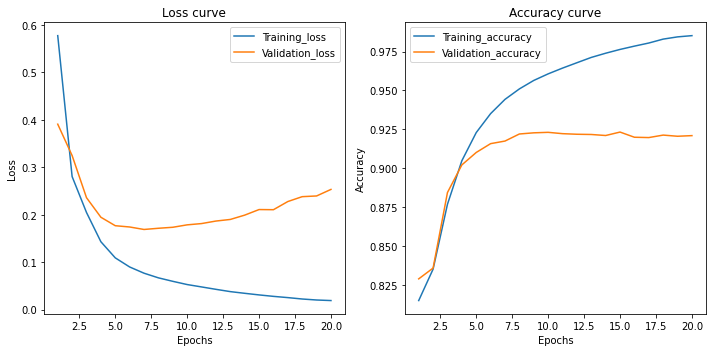

In [ ]:
#Plotting the accuracy and loss curve
fig , ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(range(1,21), history3.history["loss"], label="Training_loss")
ax[0].plot(range(1,21), history3.history["val_loss"], label="Validation_loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss curve")
ax[0].legend()


ax[1].plot(range(1,21), history3.history["accuracy"], label="Training_accuracy")
ax[1].plot(range(1,21), history3.history["val_accuracy"], label="Validation_accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy curve")
ax[1].legend()

fig.tight_layout()
plt.show()

In [ ]:
# Prediction on validation set
pred=[]
for sent in val_sentences:
  p = model_gru.predict(np.array(sent).reshape(-1,1))
  pred.append(np.argmax(p,axis=2))

In [ ]:
#Flatten the array of true validation tags and pred validation tags to calculate the f1_score
val_pred = []
val_true = []
for i in range(len(pred)):
  for j, p in enumerate(pred[i]):
    val_pred.append(p)
    val_true.append(val_tags[i][j])

print(len(val_pred), len(val_true))

81829 81829


In [ ]:
#Calculate the f1_score on validation set
f1_score_gru = f1_score(val_true, val_pred, average = "weighted")

#calculate the accuracy on validation set
accuracy_gru = accuracy_score(val_true, val_pred)

In [ ]:
print(f"The f1_score of GRU model on validation set is {np.round(f1_score_gru*100,2)}%")
print(f"The accuracy of GRU model on validation set is {np.round(accuracy_gru*100,2)}%")

The f1_score of GRU model on validation set is 83.41%
The accuracy of GRU model on validation set is 84.08%


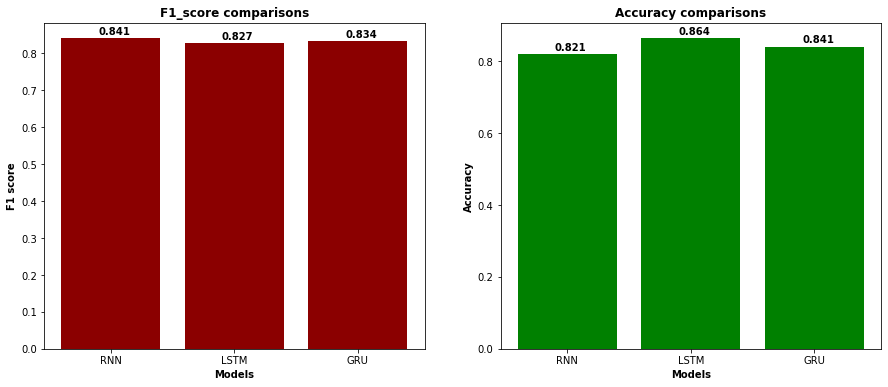

In [ ]:
model_names = ["RNN", "LSTM", "GRU"]
f1_scores = [f1_score_rnn, f1_score_lstm, f1_score_gru]
accuracy_list = [accuracy_rnn, accuracy_lstm, accuracy_gru]

fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].bar(model_names, f1_scores, color = "darkred")
for i, v in enumerate(f1_scores):
    ax[0].text(i-0.1 , v + 0.01, str(np.round(f1_scores[i],3)),
            color = 'k', fontweight = 'bold')
    
ax[0].set_title("F1_score comparisons",fontweight = "bold")
ax[0].set_xlabel("Models",fontweight = "bold")
ax[0].set_ylabel("F1 score",fontweight = "bold")

ax[1].bar(model_names, accuracy_list, color = "g")
for i, v in enumerate(accuracy_list):
    ax[1].text(i-0.1 , v + 0.01, str(np.round(accuracy_list[i],3)),
            color = 'k', fontweight = 'bold')
    
ax[1].set_title("Accuracy comparisons",fontweight = "bold")
ax[1].set_xlabel("Models",fontweight = "bold")
ax[1].set_ylabel("Accuracy",fontweight = "bold")

plt.show()

#Pretrained ELMo embedding

###RNN

In [ ]:
# splitting the data into train and validation
train_tokens_elmo = tokens[:46*32]
val_tokens_elmo = tokens[46*32:54*32]
train_tags_elmo = labels[:46*32]
val_tags_elmo = labels[46*32:54*32]

In [ ]:
# padding the sequences

train_label_elmo = tf.keras.preprocessing.sequence.pad_sequences(train_tags_elmo, padding="post", value = tag_to_id["O"])

val_label_elmo = tf.keras.preprocessing.sequence.pad_sequences(val_tags_elmo, padding="post", value = tag_to_id["O"],maxlen = 794)

In [ ]:
# post padding the input sequences with "padword"
train_data_elmo = []
val_data_elmo = []
for i in range(len(train_tokens_elmo)):
  ele = 794-len(train_tokens_elmo[i])
  tok = train_tokens_elmo[i]
  if ele > 0 :
    for j in range(ele):
      tok.append("padword")
  train_data_elmo.append(tok)

for i in range(len(val_tokens_elmo)):
  ele = 794-len(val_tokens_elmo[i])
  tok = val_tokens_elmo[i]
  if ele > 0 :
    for j in range(ele):
      tok.append("padword")
  val_data_elmo.append(tok)


train_data_elmo = np.array(train_data_elmo)
val_data_elmo = np.array(val_data_elmo)

In [ ]:
# define max_length and batch_size
max_len = 794
batch_size = 32

In [ ]:
train_data_elmo.shape,train_label_elmo.shape,val_data_elmo.shape,val_label_elmo.shape

((1472, 794), (1472, 794), (256, 794), (256, 794))

In [ ]:
# Reshape the train and validation labels
train_label_elmo = train_label_elmo.reshape(train_label_elmo.shape[0],train_label_elmo.shape[1],1)
val_label_elmo = val_label_elmo.reshape(val_label_elmo.shape[0],val_label_elmo.shape[1],1)

In [ ]:
#Import pretrained ELMo model
elmo_model = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)


In [ ]:
#Creating a Elmoembedding function to use it as a layer 
def Elmoembedding(x):
  return elmo_model(inputs = {
                              "tokens" : tf.squeeze(tf.cast(x, dtype = tf.string)),
                              "sequence_len" : batch_size*[max_len]
                             },
                    signature = "tokens",
                    as_dict = True)["elmo"]

In [ ]:
#RNN model architecture with ELMo embeddings
input = tf.keras.Input(shape = [None] , dtype = tf.string)

emb = tf.keras.layers.Lambda(Elmoembedding, output_shape = (1024,))(input)
l1= tf.keras.layers.SimpleRNN(128, return_sequences = True, name = "RNN_layer_1")(emb)
l2 = tf.keras.layers.SimpleRNN(128, return_sequences = True, name = "RNN_layer_2")(l1)
l3 = tf.keras.layers.Dense(512, activation = "relu", name = "Dense_layer_1")(l2)
l4 = tf.keras.layers.Dropout(0.2, name = "Dropout_layer")(l3)
l5 = tf.keras.layers.Dense(256, activation = "relu", name = "Dense_layer_2")(l4)
output = tf.keras.layers.Dense(num_tags, activation = 'softmax', name = "output_layer")(l5)


model_rnn_2 = tf.keras.Model(input, output)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
#Model summary
model_rnn_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
lambda (Lambda)              (32, None, 1024)          0         
_________________________________________________________________
RNN_layer_1 (SimpleRNN)      (32, None, 128)           147584    
_________________________________________________________________
RNN_layer_2 (SimpleRNN)      (32, None, 128)           32896     
_________________________________________________________________
Dense_layer_1 (Dense)        (32, None, 512)           66048     
_________________________________________________________________
Dropout_layer (Dropout)      (32, None, 512)           0         
_________________________________________________________________
Dense_layer_2 (Dense)        (32, None, 256)           131328

In [ ]:
#Compile and fitting the model

model_rnn_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                    optimizer="adam",
                    metrics = ["accuracy"])

with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  history4 = model_rnn_2.fit(train_data_elmo, train_label_elmo, validation_data = (val_data_elmo, val_label_elmo), epochs= 5, batch_size = 32)
  model_rnn_2.save_weights("Elmo_rnn.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1472 samples, validate on 256 samples
Epoch 1/5
1472/1472 [==============================] - 203s 138ms/sample - loss: 0.6012 - acc: 0.8973 - val_loss: 0.2958 - val_acc: 0.9407
Epoch 2/5
1472/1472 [==============================] - 200s 136ms/sample - loss: 0.2577 - acc: 0.9479 - val_loss: 0.2231 - val_acc: 0.9534
Epoch 3/5
1472/1472 [==============================] - 201s 136ms/sample - loss: 0.2097 - acc: 0.9552 - val_loss: 0.1910 - val_acc: 0.9588
Epoch 4/5
1472/1472 [==============================] - 200s 136ms/sample - loss: 0.1836 - acc: 0.9601 - val_loss: 0.1705 - val_acc: 0.9621
Epoch 5/5
1472/1472 [==============================] - 200s 136ms/sample - loss: 0.1665 - acc: 0.9629 - val_loss: 0.1564 - val_acc: 0.9640


In [ ]:
#prediction on validation set
with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  model_rnn_2.load_weights("/content/Elmo_rnn.h5")
  pred = model_rnn_2.predict(val_data_elmo)
  

In [ ]:
pred = pred.argmax(axis = 2)
pred.shape

(256, 794)

In [ ]:
#Flatten the array of true validation tags and pred validation tags to calculate the f1_score
val_pred = []
val_true = []
for i in range(len(pred)):
  for j, p in enumerate(pred[i]):
    val_pred.append(p)
    val_true.append(val_label_elmo[i][j])

print(len(val_pred), len(val_true))

203264 203264


In [ ]:
#Calculate the f1_score on validation set
f1_score_elmo_rnn = f1_score(val_true, val_pred, average = "weighted")

#calculate the accuracy on validation set
accuracy_elmo_rnn = accuracy_score(val_true, val_pred)

In [ ]:
print(f"The f1_score of ELMo RNN model on validation set is {np.round(f1_score_elmo_rnn*100,2)}%")
print(f"The accuracy of ELMo RNN model on validation set is {np.round(accuracy_elmo_rnn*100,2)}%")

The f1_score of ELMo RNN model on validation set is 95.42%
The accuracy of ELMo RNN model on validation set is 96.52%


###LSTM

In [ ]:
#LSTM model architecture with ELMo embeddings
input = tf.keras.Input(shape = [None] , dtype = tf.string)

emb = tf.keras.layers.Lambda(Elmoembedding, output_shape = (1024,))(input)

l1= tf.keras.layers.LSTM(128, return_sequences = True, name = "LSTM_layer_1")(emb)
l2= tf.keras.layers.LSTM(128, return_sequences = True, name = "LSTM_layer_2")(l1)
l3 = tf.keras.layers.Dense(512, activation = "relu", name = "Dense_layer_1")(l2)
l4 = tf.keras.layers.Dropout(0.2, name = "Dropout_layer")(l3)
l5 = tf.keras.layers.Dense(256, activation = "relu", name = "Dense_layer_2")(l4)
output = tf.keras.layers.Dense(num_tags, activation = 'softmax', name = "output_layer")(l5)
model_lstm_2 = tf.keras.Model(input, output)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
#Model summary
model_lstm_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
lambda_1 (Lambda)            (32, None, 1024)          0         
_________________________________________________________________
LSTM_layer_1 (LSTM)          (32, None, 128)           590336    
_________________________________________________________________
LSTM_layer_2 (LSTM)          (32, None, 128)           131584    
_________________________________________________________________
Dense_layer_1 (Dense)        (32, None, 512)           66048     
_________________________________________________________________
Dropout_layer (Dropout)      (32, None, 512)           0         
_________________________________________________________________
Dense_layer_2 (Dense)        (32, None, 256)           1313

In [ ]:
#Compile and fitting the model

model_lstm_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                    optimizer="adam",
                    metrics = ["accuracy"])

with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  history5 = model_lstm_2.fit(train_data_elmo, train_label_elmo, validation_data = (val_data_elmo, val_label_elmo), epochs= 5, batch_size = 32)
  model_lstm_2.save_weights("Elmo_lstm.h5")

Train on 1472 samples, validate on 256 samples
Epoch 1/5
1472/1472 [==============================] - 269s 183ms/sample - loss: 0.6551 - acc: 0.9153 - val_loss: 0.3708 - val_acc: 0.9370
Epoch 2/5
1472/1472 [==============================] - 247s 168ms/sample - loss: 0.3151 - acc: 0.9360 - val_loss: 0.2606 - val_acc: 0.9444
Epoch 3/5
1472/1472 [==============================] - 246s 167ms/sample - loss: 0.2388 - acc: 0.9502 - val_loss: 0.2133 - val_acc: 0.9535
Epoch 4/5
1472/1472 [==============================] - 246s 167ms/sample - loss: 0.2037 - acc: 0.9543 - val_loss: 0.1886 - val_acc: 0.9568
Epoch 5/5
1472/1472 [==============================] - 247s 168ms/sample - loss: 0.1832 - acc: 0.9586 - val_loss: 0.1714 - val_acc: 0.9608


In [ ]:
#prediction on validation set
with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  model_lstm_2.load_weights("/content/Elmo_lstm.h5")
  pred = model_lstm_2.predict(val_data_elmo)
  

In [ ]:
pred = pred.argmax(axis = 2)
pred.shape

#Flatten the array of true validation tags and pred validation tags to calculate the f1_score
val_pred = []
val_true = []
for i in range(len(pred)):
  for j, p in enumerate(pred[i]):
    val_pred.append(p)
    val_true.append(val_label_elmo[i][j])

print(len(val_pred), len(val_true))

203264 203264


In [ ]:
#Calculate the f1_score on validation set
f1_score_elmo_lstm = f1_score(val_true, val_pred, average = "weighted")

#calculate the accuracy on validation set
accuracy_elmo_lstm = accuracy_score(val_true, val_pred)

In [ ]:
print(f"The f1_score of ELMo LSTM model on validation set is {np.round(f1_score_elmo_lstm*100,2)}%")
print(f"The accuracy of ELMo LSTM model on validation set is {np.round(accuracy_elmo_lstm*100,2)}%")

The f1_score of ELMo LSTM model on validation set is 94.76%
The accuracy of ELMo LSTM model on validation set is 96.08%


###GRU

In [ ]:
#GRU model architecture with ELMo embeddings
input = tf.keras.Input(shape = [None] , dtype = tf.string)

emb = tf.keras.layers.Lambda(Elmoembedding, output_shape = (1024,))(input)

l1= tf.keras.layers.GRU(128, return_sequences = True, name = "GRU_layer_1")(emb)
l2= tf.keras.layers.GRU(128, return_sequences = True, name = "GRU_layer_2")(l1)
l3 = tf.keras.layers.Dense(512, activation = "relu", name = "Dense_layer_1")(l2)
l4 = tf.keras.layers.Dropout(0.2, name = "Dropout_layer")(l3)
l5 = tf.keras.layers.Dense(256, activation = "relu", name = "Dense_layer_2")(l4)
output = tf.keras.layers.Dense(num_tags, activation = 'softmax', name = "output_layer")(l5)

model_gru_2 = tf.keras.Model(input, output)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
#Model summary
model_gru_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
lambda_3 (Lambda)            (32, None, 1024)          0         
_________________________________________________________________
GRU_layer_1 (GRU)            (32, None, 128)           442752    
_________________________________________________________________
GRU_layer_2 (GRU)            (32, None, 128)           98688     
_________________________________________________________________
output_layer (Dense)         (32, None, 63)            8127      
Total params: 549,567
Trainable params: 549,567
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile and fitting the model

model_gru_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                    optimizer="adam",
                    metrics = ["accuracy"])

with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  history6 = model_gru_2.fit(train_data_elmo, train_label_elmo, validation_data = (val_data_elmo, val_label_elmo), epochs= 5, batch_size = 32)
  model_gru_2.save_weights("Elmo_gru.h5")

Train on 1472 samples, validate on 256 samples
Epoch 1/5
1472/1472 [==============================] - 237s 161ms/sample - loss: 0.5894 - acc: 0.9107 - val_loss: 0.2866 - val_acc: 0.9460
Epoch 2/5
1472/1472 [==============================] - 235s 160ms/sample - loss: 0.2430 - acc: 0.9499 - val_loss: 0.2078 - val_acc: 0.9534
Epoch 3/5
1472/1472 [==============================] - 235s 160ms/sample - loss: 0.1931 - acc: 0.9566 - val_loss: 0.1755 - val_acc: 0.9609
Epoch 4/5
1472/1472 [==============================] - 235s 159ms/sample - loss: 0.1667 - acc: 0.9624 - val_loss: 0.1540 - val_acc: 0.9645
Epoch 5/5
1472/1472 [==============================] - 234s 159ms/sample - loss: 0.1483 - acc: 0.9652 - val_loss: 0.1383 - val_acc: 0.9666


In [ ]:
#prediction on validation set
with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  model_gru_2.load_weights("/content/Elmo_gru.h5")
  pred = model_gru_2.predict(val_data_elmo)
  

In [ ]:
pred = pred.argmax(axis = 2)
pred.shape

#Flatten the array of true validation tags and pred validation tags to calculate the f1_score
val_pred = []
val_true = []
for i in range(len(pred)):
  for j, p in enumerate(pred[i]):
    val_pred.append(p)
    val_true.append(val_label_elmo[i][j])

print(len(val_pred), len(val_true))

203264 203264


In [ ]:
#Calculate the f1_score on validation set
f1_score_elmo_gru = f1_score(val_true, val_pred, average = "weighted")

#calculate the accuracy on validation set
accuracy_elmo_gru = accuracy_score(val_true, val_pred)

In [ ]:
print(f"The f1_score of ELMo GRU model on validation set is {np.round(f1_score_elmo_gru*100,2)}%")
print(f"The accuracy of ELMo GRU model on validation set is {np.round(accuracy_elmo_gru*100,2)}%")

The f1_score of ELMo GRU model on validation set is 95.71%
The accuracy of ELMo GRU model on validation set is 96.66%


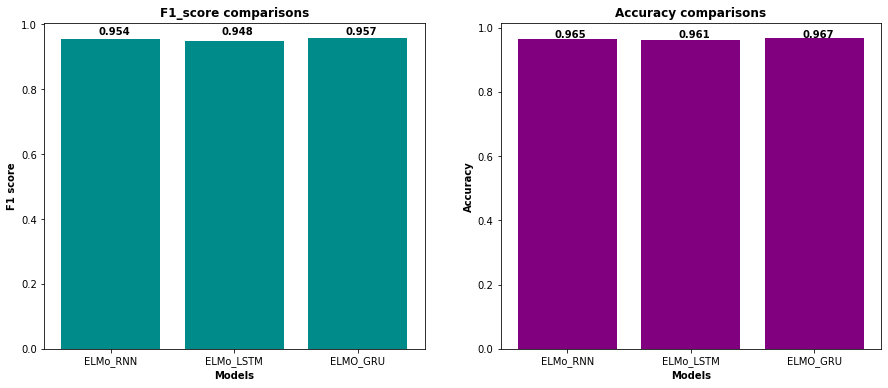

In [ ]:
model_names = ["ELMo_RNN", "ELMo_LSTM", "ELMO_GRU"]
f1_scores = [f1_score_elmo_rnn, f1_score_elmo_lstm, f1_score_elmo_gru]
accuracy_list = [accuracy_elmo_rnn, accuracy_elmo_lstm, accuracy_elmo_gru]

fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].bar(model_names, f1_scores, color = "darkcyan")
for i, v in enumerate(range(3)):
    ax[0].text(v-0.1 , 0.97, str(np.round(f1_scores[i],3)),
            color = 'k', fontweight = 'bold')
    
ax[0].set_title("F1_score comparisons",fontweight = "bold")
ax[0].set_xlabel("Models",fontweight = "bold")
ax[0].set_ylabel("F1 score",fontweight = "bold")

ax[1].bar(model_names, accuracy_list, color = "purple")
for i, v in enumerate(range(3)):
    ax[1].text(v-0.1 , 0.97, str(np.round(accuracy_list[i],3)),
            color = 'k', fontweight = 'bold')
    
ax[1].set_title("Accuracy comparisons",fontweight = "bold")
ax[1].set_xlabel("Models",fontweight = "bold")
ax[1].set_ylabel("Accuracy",fontweight = "bold")

plt.show()

#Bert

In [12]:
sentences_list = [" ".join(tokens[i]) for i in range(len(tokens))]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(sentences_list, labels, train_size = 0.85, random_state = 34)

In [14]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 20.9 MB/s 
     |████████████████████████████████| 596 kB 60.6 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 6.6 MB 59.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [29]:
from transformers import AutoTokenizer, TFDistilBertModel, TFTrainer, TFTrainingArguments

In [16]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [35]:
train_encodings = tokenizer(X_train, truncation = True, max_length = 794, padding = True,add_special_tokens = True, return_tensors = "tf")
test_encodings = tokenizer(X_test, max_length = 794, truncation = True ,padding = True,add_special_tokens = True, return_tensors = "tf")

In [30]:
Bert = TFDistilBertModel.from_pretrained("dslim/bert-base-NER")

You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

Some layers from the model checkpoint at dslim/bert-base-NER were not used when initializing TFDistilBertModel: ['dropout_37', 'classifier', 'bert']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertModel were not initialized from the model checkpoint at dslim/bert-base-NER and are newly initialized: ['distilbert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
input_ids = tf.keras.Input(shape = (794,), dtype = tf.int32, name = "input_ids")
input_mask = tf.keras.Input(shape = (794,), dtype = tf.int32,  name = "input_mask")

emb = Bert(input_ids, attention_mask = input_mask)[0]
l1 = tf.keras.layers.LSTM(128, return_sequences = True, name = "LSTM_layer")(emb)
#l2 = tf.keras.layers.GlobalAveragePooling1D()(l1)
l3 = tf.keras.layers.Dense(128,activation = "relu")(l1)
l4 = tf.keras.layers.Dropout(0.2)(l3)
output = tf.keras.layers.Dense(63, activation = 'softmax', name = "output_layer")(l4)

bert_model = tf.keras.Model([input_ids, input_mask], output)
bert_model.layers[2].trainable = True

In [38]:
bert_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                   optimizer = "adam",
                   metrics = ["accuracy"])

In [39]:
bert_model.fit(x = {"input_ids" : train_encodings["input_ids"], "input_mask" : train_encodings["attention_mask"]}, y = y_train, batch_size = 4, epochs = 2,
               validation_data = ({"input_ids" : test_encodings["input_ids"], "input_mask" : test_encodings["attention_mask"]}, y_test))

Epoch 1/2
373/373 [==============================] - 373s 958ms/step - loss: 0.5266 - accuracy: 0.9286 - val_loss: 0.4563 - val_accuracy: 0.9330
Epoch 2/2
373/373 [==============================] - 354s 948ms/step - loss: 0.4485 - accuracy: 0.9363 - val_loss: 0.4548 - val_accuracy: 0.9330


In [41]:
test_acc=bert_model.evaluate({"input_ids" : test_encodings["input_ids"], "input_mask" : test_encodings["attention_mask"]}, y_test)[1]


9/9 [==============================] - 18s 2s/step - loss: 0.4548 - accuracy: 0.9330
The accuracy of Bert model on test set is 0.9330482482910156


In [42]:
print(f"The accuracy of Bert model on test set is {np.round(test_acc*100,2)}%")

The accuracy of Bert model on test set is 93.3%


#Transformers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # self-attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm

In [ ]:
embed_dim = 300  # Embedding size for each token
num_heads = 5  # Number of attention heads
ff_dim = 300  # Hidden layer size in feed forward network inside transformer

# model architecture
input = tf.keras.Input(shape=[None])

emb = tf.keras.layers.Embedding(input_dim = vocab_size+1, output_dim = embed_dim, mask_zero = True)(input)
l1 = TransformerBlock(embed_dim, num_heads, ff_dim)(emb)
#l2 = tf.keras.layers.GlobalAveragePooling1D()(l1)
l3 = tf.keras.layers.Dropout(0.2)(l1)
l4 = tf.keras.layers.Dense(128,activation = "relu")(l3)
l5 = tf.keras.layers.Dropout(0.2)(l4)
output = tf.keras.layers.Dense(num_tags, activation = 'softmax', name = "output_layer")(l5)

transformer_model = tf.keras.Model(input, output)


In [ ]:
# model summary
transformer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         7466700   
                                                                 
 transformer_block (Transfor  (None, None, 300)        1986600   
 merBlock)                                                       
                                                                 
 dropout_2 (Dropout)         (None, None, 300)         0         
                                                                 
 dense_2 (Dense)             (None, None, 128)         38528     
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                             

In [ ]:
transformer_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                          optimizer="adam",
                          metrics = ["accuracy"])

history7 = transformer_model.fit(train_data, train_label, validation_data = (val_data, val_label), epochs = 10, batch_size = 32)

Epoch 1/10
47/47 [==============================] - 18s 284ms/step - loss: 0.5528 - accuracy: 0.9065 - val_loss: 0.2727 - val_accuracy: 0.9428
Epoch 2/10
47/47 [==============================] - 13s 284ms/step - loss: 0.1809 - accuracy: 0.9581 - val_loss: 0.2036 - val_accuracy: 0.9526
Epoch 3/10
47/47 [==============================] - 14s 289ms/step - loss: 0.1299 - accuracy: 0.9675 - val_loss: 0.1902 - val_accuracy: 0.9554
Epoch 4/10
47/47 [==============================] - 14s 295ms/step - loss: 0.1092 - accuracy: 0.9711 - val_loss: 0.1832 - val_accuracy: 0.9563
Epoch 5/10
47/47 [==============================] - 14s 298ms/step - loss: 0.0997 - accuracy: 0.9726 - val_loss: 0.1844 - val_accuracy: 0.9558
Epoch 6/10
47/47 [==============================] - 14s 305ms/step - loss: 0.0940 - accuracy: 0.9735 - val_loss: 0.1818 - val_accuracy: 0.9565
Epoch 7/10
47/47 [==============================] - 15s 315ms/step - loss: 0.0904 - accuracy: 0.9740 - val_loss: 0.1850 - val_accuracy: 0.9571

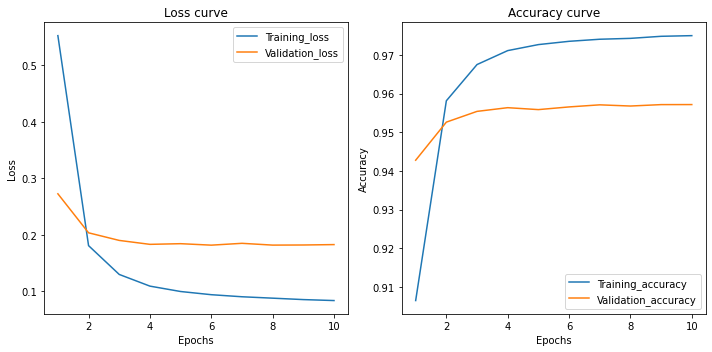

In [ ]:
#Plotting the accuracy and loss curve
fig , ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(range(1,11), history7.history["loss"], label="Training_loss")
ax[0].plot(range(1,11), history7.history["val_loss"], label="Validation_loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss curve")
ax[0].legend()


ax[1].plot(range(1,11), history7.history["accuracy"], label="Training_accuracy")
ax[1].plot(range(1,11), history7.history["val_accuracy"], label="Validation_accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy curve")
ax[1].legend()

fig.tight_layout()
plt.show()

In [ ]:
# creating a function to make prediction
def prediction(model, data):
  data = data.split(" ")
  d = clean_tokens([data],tokenizer)[0]
  len_sen = len(d)
  tokens_list = tf.keras.preprocessing.sequence.pad_sequences([d], padding="post",maxlen = 794).reshape(794,1)
  pred = model.predict(tokens_list)
  pred = [i[0] for i in pred.argmax(axis = 2)]
  ent_list = []
  for i in range(len_sen):
    ent_list.append(id_to_tag[pred[i]])
  df = pd.DataFrame({"Words" : data, "Entity" : ent_list})
  return df

###### Custom prediction

In [ ]:
sentence = "Pavlos Protopapas is the Scientific Program director and has had a long and distinguished career as a scientist and data science educator, and currently teaches the CS109 course series for basic and advanced data science at Harvard University, as well as the capstone course (industry-sponsored data science projects) for the IACS master’s program at Harvard." 

In [ ]:
pred = prediction(transformer_model, sentence)

In [ ]:
pred

,Words,Entity
0,Pavlos,I-Person
1,Protopapas,I-Person
2,is,O
3,the,O
4,Scientific,I-Organization
5,Program,I-Grant
6,director,B-Organization
7,and,O
8,has,O
9,had,O
